# **Analysis of RDPclassifier analysis results**  
Here we set out to understand the output of RDPclassifier taxonomic classification on our dataset in Order Diptera  
### **Setting up the environment**
1. **Setting the working directory**

In [4]:
getwd()
setwd("/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera")
getwd()

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/code"

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera"

2. **Loading packages**

In [5]:
cat("\nChecking if needed packages are installed... tidyverse packages: 'ggplot2','dplyr' and 'magrittr' and 'tools'")
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {
        install.packages("tidyverse")
} else {
        cat("\nExcellent tidyverse already installed.\nproceeding with summary analysis of RDPclassifier results...\n")
	## loading dplyr, ggplot2 and magrittr packages
    suppressMessages(library(dplyr))
    suppressMessages(library(ggplot2))
    suppressMessages(library(magrittr))
    suppressMessages(library(tools))
}
filename_ext = file_ext("enafroCOI_diptera_taxa.tsv")
filename_ext
filename = file_path_sans_ext("enafroCOI_diptera_taxa.tsv")
filename
file_path_as_absolute("enafroCOI_diptera_taxa.tsv")
workingdir=getwd()
workingdir
basename("enafroCOI_diptera_taxa.tsv")
input_src=dirname(file_path_as_absolute("enafroCOI_diptera_taxa.tsv"))
input_src


Checking if needed packages are installed... tidyverse packages: 'ggplot2','dplyr' and 'magrittr' and 'tools'
Excellent tidyverse already installed.
proceeding with summary analysis of RDPclassifier results...


[1] "tsv"

[1] "enafroCOI_diptera_taxa"

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera/enafroCOI_diptera_taxa.tsv"

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera"

[1] "enafroCOI_diptera_taxa.tsv"

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera"

3. **Loading Data**

In [6]:
cat(filename)
df_taxa = read.delim("enafroCOI_diptera_taxa.tsv", sep = "\t", stringsAsFactors = F, dec = ".", header = T) 
str(df_taxa)

enafroCOI_diptera_taxa'data.frame':	48137 obs. of  34 variables:
 $ Process_ID         : chr  "GBDP19110-15" "GBDP19109-15" "GBDP19118-15" "GBDP4645-08" ...
 $ Phylum             : chr  "Arthropoda" "Arthropoda" "Arthropoda" "Arthropoda" ...
 $ Class              : chr  "Insecta" "Insecta" "Insecta" "Insecta" ...
 $ Order              : chr  "Diptera" "Diptera" "Diptera" "Diptera" ...
 $ Family             : chr  "Psychodidae" "Psychodidae" "Psychodidae" "Ceratopogonidae" ...
 $ Subfamily          : chr  "Phlebotominae" "Phlebotominae" "Phlebotominae" "Ceratopogoninae" ...
 $ Tribe              : logi  NA NA NA NA NA NA ...
 $ Genus              : chr  "Sergentomyia" "Sergentomyia" "Sergentomyia" "Culicoides" ...
 $ Species            : chr  "Sergentomyia_minuta" "Sergentomyia_minuta" "Sergentomyia_minuta" "Culicoides_imicola" ...
 $ Subspecies         : chr  NA NA NA NA ...
 $ Country            : chr  "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ Exactsite          : chr  NA NA NA N

4. **Taking a closer look at the family taxa statistics**

In [9]:
Prefamily_df <- as.data.frame(table(c(subset(df_taxa, seq_len >= 500)$Family)), row.names = NULL)
colnames(Prefamily_df) <- c("Family","prefamfreq")
cat(nrow(subset(Prefamily_df, prefamfreq >= 20)),
    "predefined families (seq_len >= 500), with frequency of over 20, are found in this clade, out of",
   nrow(Prefamily_df),
   "represented families (seq_len >= 500)\n\n")
#subset(Prefamily_df, prefamfreq >= 20)

Asfamily_df <- as.data.frame(table(c(subset(df_taxa, Family_sc == 1.0 & seq_len >= 500)$As_family)), row.names = NULL)
colnames(Asfamily_df) <- c("As_family","asfamfreq")
cat(nrow(subset(Asfamily_df, asfamfreq >= 20)),
    "assigned families (BS score = 1.0 & seq_len >= 500), with frequency of over 20, are found in this clade out of",
   nrow(Asfamily_df),
   "represented assigned families (seq_len >= 500)\n\n")
#subset(Asfamily_df, asfamfreq >= 20)
family_df <- merge(Prefamily_df, Asfamily_df, by.x="Family", by.y="As_family")
subset(family_df, prefamfreq >= 20 | asfamfreq >= 20)

33 predefined families (seq_len >= 500), with frequency of over 20, are found in this clade, out of 62 represented families (seq_len >= 500)

22 assigned families (BS score = 1.0 & seq_len >= 500), with frequency of over 20, are found in this clade out of 45 represented assigned families (seq_len >= 500)



,Family,prefamfreq,asfamfreq
,<fct>,<int>,<int>
1,Agromyzidae,232,41
2,Anthomyiidae,38,14
3,Asilidae,54,52
5,Blephariceridae,25,25
6,Calliphoridae,459,492
7,Cecidomyiidae,345,9
8,Ceratopogonidae,2767,1246
9,Chironomidae,289,341
10,Chloropidae,66,1


5. **Taking a closer look at the genera taxa statistics**

In [10]:
Pregenus_df <- as.data.frame(table(c(subset(df_taxa, seq_len >= 500)$Genus)), row.names = NULL)
colnames(Pregenus_df) <- c("Genus","pregenusfreq")
cat(nrow(subset(Pregenus_df, pregenusfreq >= 5)),
    "predefined genera (seq_len >= 500 $ frequency >= 5) are found in this clade, out of",
   nrow(Pregenus_df),
   "represented genera (seq_len >= 500)\n\n")
#subset(Pregenus_df, pregenusfreq >= 5)

Asgenus_df <- as.data.frame(table(c(subset(df_taxa, Genus_sc == 1.0 & seq_len >= 500)$As_genus)), row.names = NULL)
colnames(Asgenus_df) <- c("As_genus","asgenusfreq")
cat(nrow(subset(Asgenus_df, asgenusfreq >= 5)),
    "assigned genera (BS score = 1.0 & seq_len >= 500), with frequency of over 5, are found in this clade out of",
   nrow(Asgenus_df),
   "represented genera (seq_len >= 500)\n\n")
#subset(Asgenus_df, asgenusfreq >= 5)
genus_df <- merge(Pregenus_df, Asgenus_df, by.x="Genus", by.y="As_genus")
subset(genus_df, pregenusfreq >= 5 | asgenusfreq >= 5)

60 predefined genera (seq_len >= 500 $ frequency >= 10) are found in this clade, out of 249 represented genera (seq_len >= 500)

77 assigned genera (BS score = 1.0 & seq_len >= 500), with frequency of over 20, are found in this clade out of 199 represented genera (seq_len >= 500)



,Genus,pregenusfreq,asgenusfreq
,<fct>,<int>,<int>
4,Aedes,546,282
6,Allobaccha,1,22
9,Anopheles,313,1159
13,Atherigona,382,11
14,Atylotus,12,23
15,Australosepsis,70,73
16,Bactrocera,473,435
22,Capparimyia,18,30
23,Carpophthoromyia,26,18


6. **Detailed analysis of the distribution of variables as a assinged by RDPclassifier**

In [82]:
# Total number of records within the file vs those with over 500 base-pairs
cat(nrow(df_taxa), "total number of records with",
    nrow(subset(df_taxa, seq_len >= 500)),
    "records having over 500 base-pairs\n")

48137 total number of records with 47507 records having over 500 base-pairs


In [83]:
# Total number of sequences with predefined species taxa vs 
# those with over 500 base-pairs
cat(nrow(subset(df_taxa, Species != "NA")),
    "records with a predefined species from which",
    nrow(subset(df_taxa, Species != "NA" & seq_len >= 500 )), 
    "have over 500 base pairs\n\n")

6629 records with a predefined species from which 6125 have over 500 base pairs



In [84]:
# All records assigned species classification
cat(nrow(subset(df_taxa, Species_sc >= 0)),
    "records were assigned species classification with bootstrap support ranging from 0 to 1\n\n")
# All records assigned species classification of BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(df_taxa, Species_sc == 1.0)),
    "records were classiffied with a bootsrap of = 1,",
   nrow(subset(df_taxa, Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(df_taxa, Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")

48137 records were assigned species classification with bootstrap support ranging from 0 to 1

8049 records were classiffied with a bootsrap of = 1, 9244 with >= 0.95 bootstrap support and 11337 with >= 0.7 bootstrap support



In [85]:
# All records with predefined species and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(df_taxa, Species != "NA" & Species_sc == 1.0)),
    "records, with predefined species, were classiffied with a bootsrap of = 1,",
   nrow(subset(df_taxa, Species != "NA" & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(df_taxa, Species != "NA" & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")
# All records with predefined species, seq-length of >= 500 and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(df_taxa, seq_len >= 500 & Species_sc == 1.0)),
    "records, with >= 500 seq. length, were classiffied with a bootsrap of = 1,",
   nrow(subset(df_taxa, seq_len >= 500 & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(df_taxa, seq_len >= 500 & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")
# All records without predefined species, but with seq-length of >= 500 and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(df_taxa, Species != "NA" & seq_len >= 500 & Species_sc == 1.0)),
    "records, with predefined species and >= 500 seq. length, were classiffied with a bootsrap of = 1,",
   nrow(subset(df_taxa, Species != "NA" & seq_len >= 500 & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(df_taxa, Species != "NA" & seq_len >= 500 & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")


4407 records, with predefined species, were classiffied with a bootsrap of = 1, 4785 with >= 0.95 bootstrap support and 5124 with >= 0.7 bootstrap support

7717 records, with >= 500 seq. length, were classiffied with a bootsrap of = 1, 8883 with >= 0.95 bootstrap support and 10957 with >= 0.7 bootstrap support

4122 records, with predefined species and >= 500 seq. length, were classiffied with a bootsrap of = 1, 4479 with >= 0.95 bootstrap support and 4802 with >= 0.7 bootstrap support



In [86]:

# All records with a predifined species or RDP species classification BS support of 1.0
df_taxa %>% filter(Species != "NA" | Species_sc == 1.0) -> df_100per_classified
# All records with a predifined species or RDP species classification BS support of 0.95
df_taxa %>% filter(Species != "NA" | Species_sc >= 0.95) -> df_95per_classified
cat(nrow(df_100per_classified),
    "records either had predefined species,",
    "or were classified with a bootstrap value of 1.0,",
   nrow(df_95per_classified),
    "with bootstrap value of >=0.95 and",
   nrow(subset(df_taxa, Species != "NA" | Species_sc >= 0.7)),
   "with boostrap value of >=0.7\n\n")


10271 records either had predefined species, or were classified with a bootstrap value of 1.0, 11088 with bootstrap value of >=0.95 and 12842 with boostrap value of >=0.7



In [87]:
#Records  with over 500 sequence length and classified into species vs those without prior classification
cat(nrow(subset(df_taxa, Species_sc == 1.0 & seq_len >= 500 )),
    "records classified into species have sequences with over 500 bases, with",
    nrow(subset(df_taxa, is.na(Species) & Species_sc == 1.0 & seq_len >= 500 )),
    "having no prior species classification\n")


7717 records classified into species have sequences with over 500 bases, with 3595 having no prior species classification


In [88]:
#Records whose assinged species at Bootstrap score of 1.0 do not match with the predefined species (clash)
cat(nrow(subset(df_taxa, Species_sc == 1.0 & Species != df_taxa$As_species)),
    "records with a species classication confidence of 1.0",
    "have differing assinged species from predefined species,",
   nrow(subset(
       df_taxa, seq_len >= 500 & Species_sc == 1.0 & Species != df_taxa$As_species)),
    "of which have over 500 base-pairs\n\n")
df_taxa_clash <- subset(
    df_taxa, seq_len >= 500 & Species_sc == 1.0 & Species != df_taxa$As_species)
#output_list = c("families_df","df_taxa_clash")
#datalist = lapply(output_list,get)
#names(datalist) <- paste(input_src,"/",output_list,sep="")
#for (i in 1:length(datalist)) {write.table(datalist[i],file = paste(names(datalist[i]), ".tsv", sep = ""), row.names = FALSE, col.names = TRUE, sep = "\t", quote = FALSE)}
write.table(df_taxa_clash, file = paste(input_src,"/",filename, "_clash.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
write.table(family_df, file = paste(input_src,"/",filename, "_families.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
write.table(genus_df, file = paste(input_src,"/",filename, "_genera.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
#head(diptera_classified)
head(subset(df_taxa, Species != "NA" & Species_sc == 0))

422 records with a species classication confidence of 1.0 have differing assinged species from predefined species, 303 of which have over 500 base-pairs



,Process_ID,Phylum,Class,Order,Family,Subfamily,Tribe,Genus,Species,Subspecies,⋯,As_class,Class_sc,As_order,Order_sc,As_family,Family_sc,As_genus,Genus_sc,As_species,Species_sc
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
8493,NHMBF089-11,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.87,Diptera,0.45,Tabanidae,0.06,Atylotus,0.00,Atylotus_thoracius,0
8494,NHMBF090-11,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.87,Diptera,0.45,Tabanidae,0.06,Atylotus,0.00,Atylotus_thoracius,0
8617,ASIND134-12,Arthropoda,Insecta,Diptera,Syrphidae,Microdontinae,NA,Paragodon,Paragodon_paragoides,NA,⋯,Insecta,0.98,Diptera,0.42,Muscidae,0.05,Hydrotaea,0.04,Hydrotaea_pellucens,0
40445,NHMBF097-12,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.92,Diptera,0.49,Tabanidae,0.13,Atylotus,0.01,Atylotus_thoracius,0


5. **Graphical representation of the distributions**

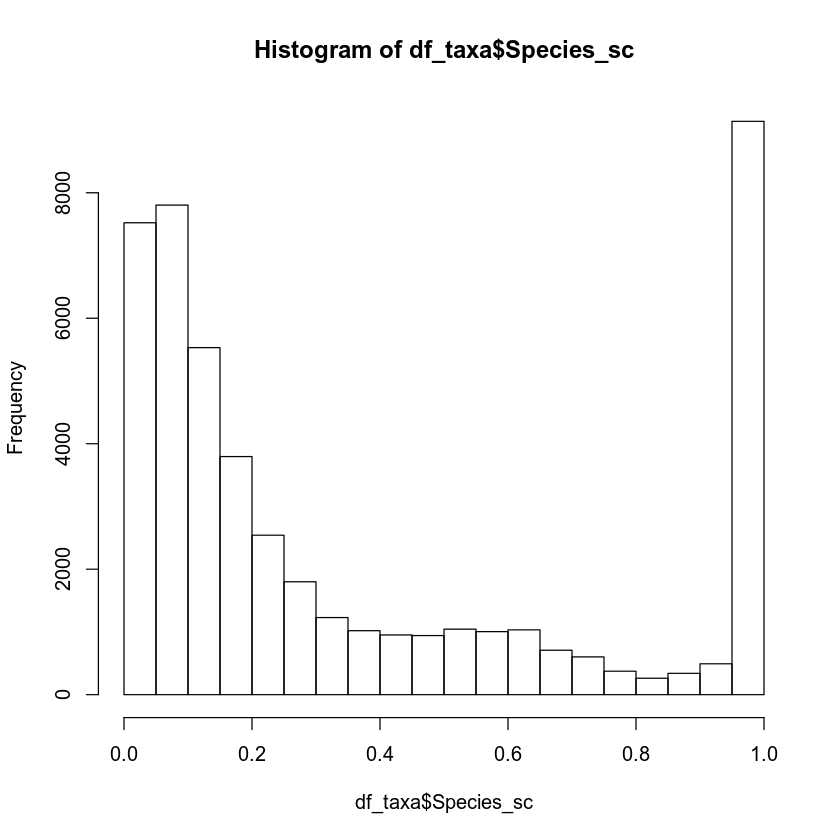

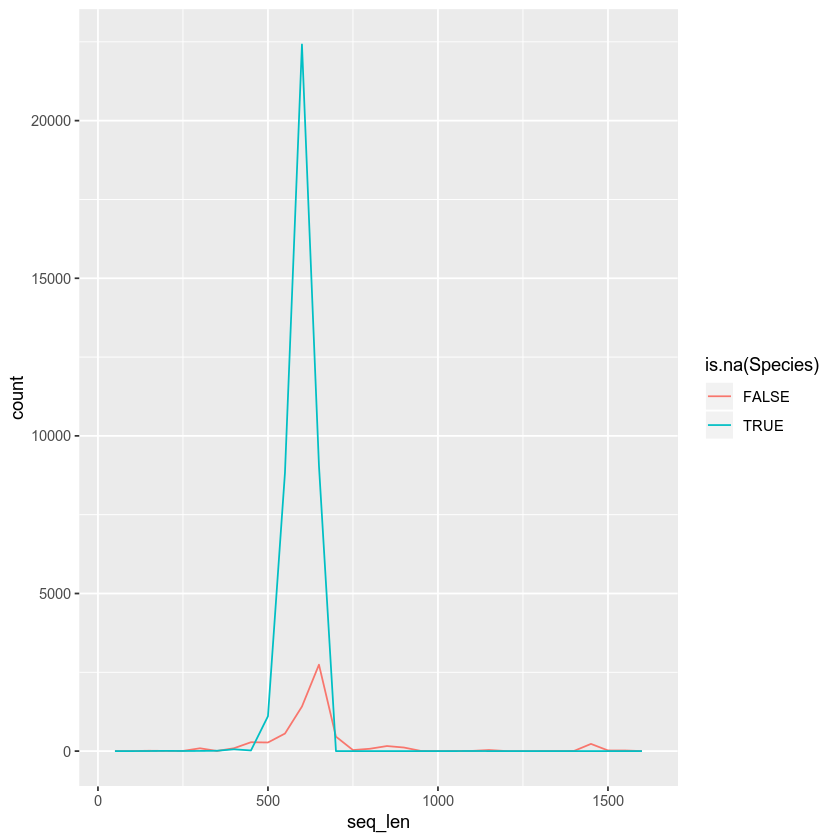

63 Families are represented


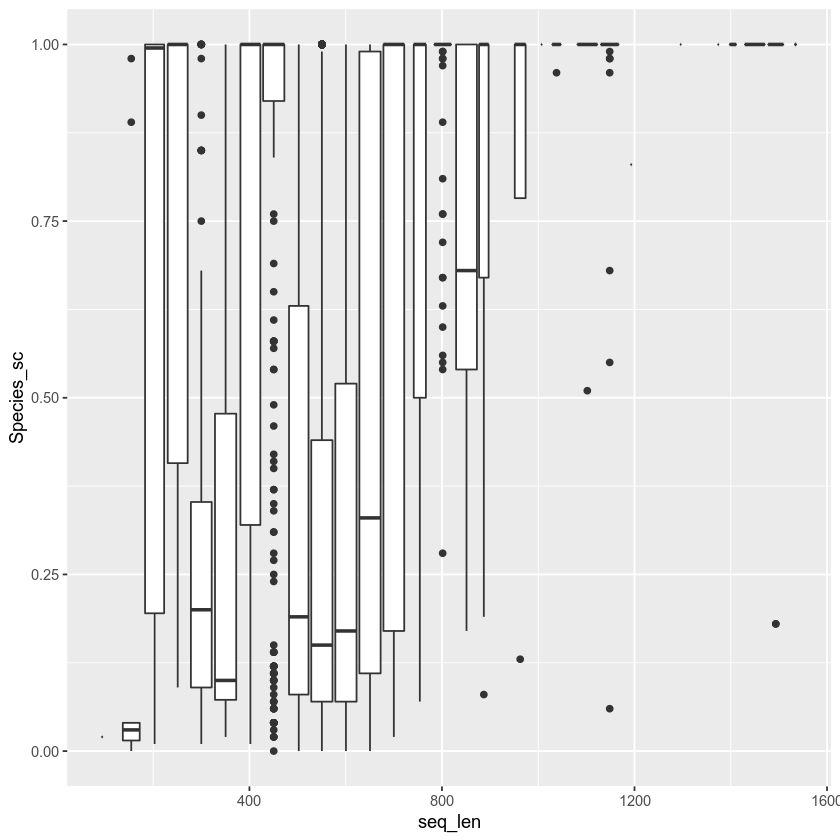

11337 sequences have over 0.7 species identification score


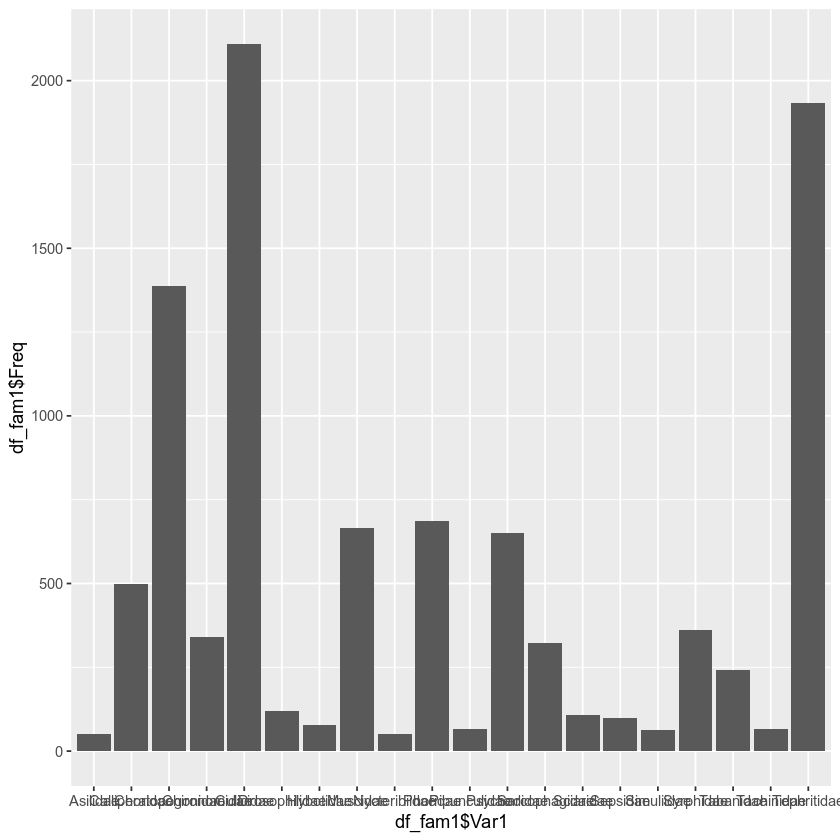

In [76]:
#Species score distribution.
hist(df_taxa$Species_sc)
ggplot(df_taxa, mapping = aes(x = seq_len)) + geom_freqpoly(
    mapping = aes(colour = is.na(Species)), binwidth = 50)
ggplot(df_taxa, aes(x = seq_len, y = Species_sc)) + geom_boxplot(
    mapping = aes(group = cut_width(seq_len, 50)))
cat(nrow(as.data.frame(table(c((df_taxa)$Family)))),
    "Families are represented\n")
#as.data.frame(table(c(diptera_taxa$Family)))
df_taxa %>% filter(df_taxa$Family_sc == 1.0 ) -> df_family
as.data.frame(table(c(df_family$As_family))) -> df_fam
df_fam %>% filter(df_fam$Freq > 50 ) -> df_fam1
ggplot(
    data = df_fam1
) + geom_bar(
    mapping = aes (x = df_fam1$Var1, y = df_fam1$Freq),
    stat = "identity")
#ggplot( data = diptera_family ) + geom_bar(mapping = aes(x = diptera_family$As_family ))
df_taxa %>% filter(Species_sc >= 0.7 ) -> df_newsp
cat(nrow(df_newsp),"sequences have over 0.7 species identification score\n")
#head(diptera_newsp)
#hist(diptera_newsp$)
#ggplot(diptera_genussc_over07, aes(x = seq_len, y = Species_sc)) + geom_line()
#hist(as.integer(diptera_genussc_over07$seq_len))